In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [5]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [28]:
pd.concat([df_train.dtypes.to_frame(3).T, df_train.head(2)])

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3,int64,object,object,int64,object,object,float64,object,float64,object,object
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [48]:
df_train.groupby(["Gender", "Graduated"]).size()

Gender  Graduated
Female  No           1303
        Yes          2316
Male    No           1719
        Yes          2652
dtype: int64

# EDA and Preprocessing

## Impute null

In [56]:
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
# train
numeric_cols = df_train.select_dtypes(include=["number"]).columns
non_numeric_cols = df_train.select_dtypes(exclude=["number"]).columns

df_train[numeric_cols] = df_train[numeric_cols].fillna(df_train[numeric_cols].mean())
df_train[non_numeric_cols] = df_train[non_numeric_cols].fillna(df_train[non_numeric_cols].mode().T[0].to_dict())

# test
df_test[numeric_cols] = df_test[numeric_cols].fillna(df_train[numeric_cols].mean())
non_numeric_cols2 = [col for col in non_numeric_cols if col in df_test]
df_test[non_numeric_cols2] = df_test[non_numeric_cols2].fillna(df_train[non_numeric_cols2].mode().T[0].to_dict())

In [89]:
df_train.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## EDA

<Axes: xlabel='Spending_Score'>

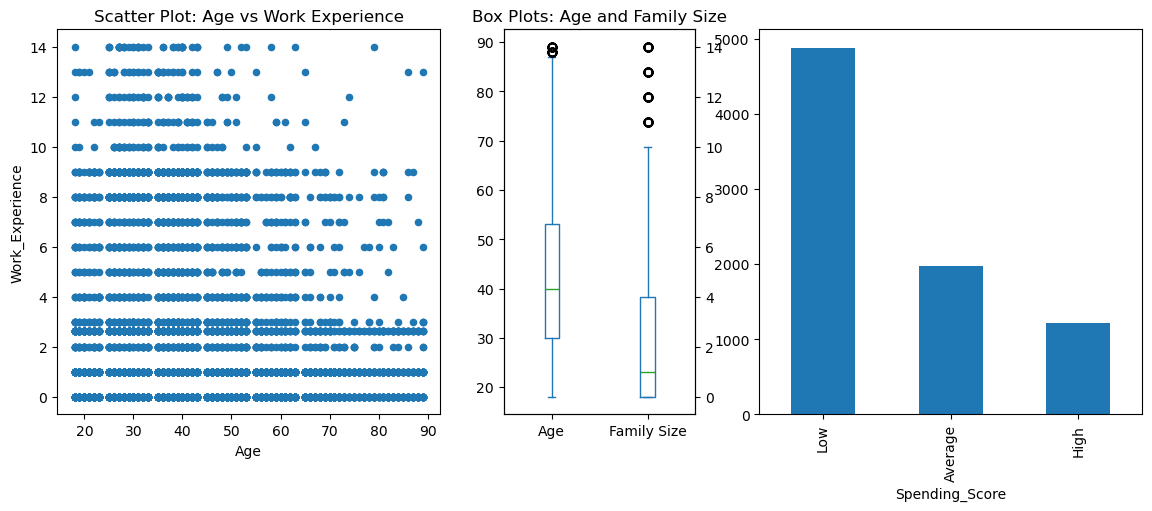

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5), gridspec_kw={'width_ratios': [2, 1,2]})
df_train.plot.scatter("Age", "Work_Experience", ax=axes[0])
axes[0].set_title("Scatter Plot: Age vs Work Experience")

df_train["Age"].plot.box(ax=axes[1], positions=[1])
ax2 = axes[1].twinx()
df_train["Work_Experience"].plot.box(positions=[2])

axes[1].set_title("Box Plots: Age and Family Size")
axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(["Age", "Family Size"])

df_train["Spending_Score"].value_counts().plot.bar(ax=axes[2])


Data has issues, 20 years old and 14 years of experience is weird

Text(0.5, 1.0, 'Spending Score')

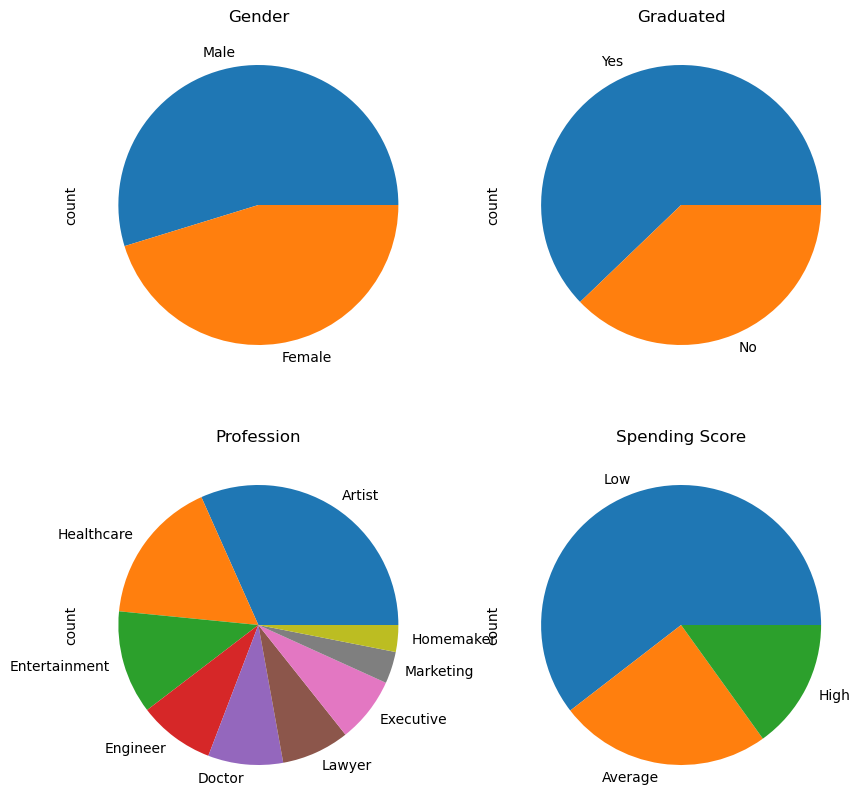

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

pd.crosstab(df_train["Gender"], df_train["Graduated"])

df_train["Gender"].value_counts().plot.pie(ax=axes[0, 0])
axes[0, 0].set_title("Gender")  

df_train["Graduated"].value_counts().plot.pie(ax=axes[0, 1])
axes[0, 1].set_title("Graduated")  

df_train["Profession"].value_counts().plot.pie(ax=axes[1, 0])
axes[1, 0].set_title("Profession")  

df_train["Spending_Score"].value_counts().plot.pie(ax=axes[1, 1])
axes[1, 1].set_title("Spending Score")  

## Convert categorical to numeric

In [112]:
from sklearn.preprocessing import LabelEncoder
numeric_features = ['Age', 'Work_Experience','Family_Size',]
non_numeric_features = ['Gender', 'Ever_Married',  'Graduated', 'Profession',  'Spending_Score' ]
X_train = df_train[numeric_features + non_numeric_features].copy()
X_test = df_test[numeric_features + non_numeric_features].copy()
for col in non_numeric_features:
    le = LabelEncoder()
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col]) 

# Clustering 1 KMean

For KNN since it is euclidean distance, we standardize all columns



In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_train)

## Determine K using Elbow method to 


 WCSS = within-cluster sum of squares

In [117]:
from sklearn.cluster import KMeans
wcss = {}
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    wcss[k] = km.inertia_


c:\Users\mamma\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mamma\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\mamma\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mamma\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\mamma\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Text(0, 0.5, 'WCSS')

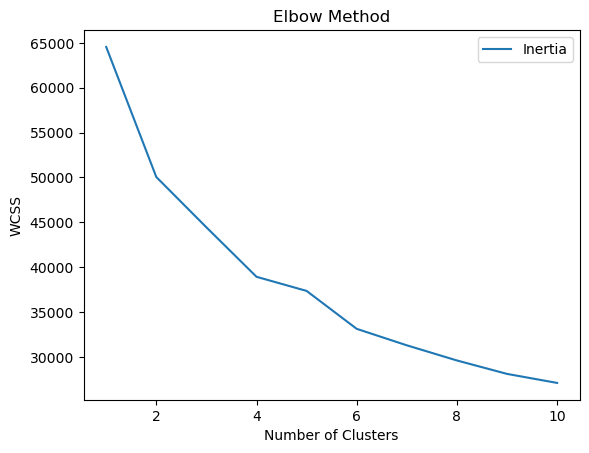

In [127]:
pd.Series(wcss).to_frame("Inertia").plot()
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [131]:
# k=4 is selected using elbow method

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(df_scaled)


In [134]:
pd.concat([df_train, pd.Series(km.labels_).to_frame("cluster")], axis=1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,cluster
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,2
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,3
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.000000,Low,7.0,Cat_1,D,2
8064,464685,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D,2
8065,465406,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D,0
8066,467299,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B,2


## Determining k Using Silhouette method

Silhouette scores measure how well-separated the clusters are.

Text(0, 0.5, 'Score')

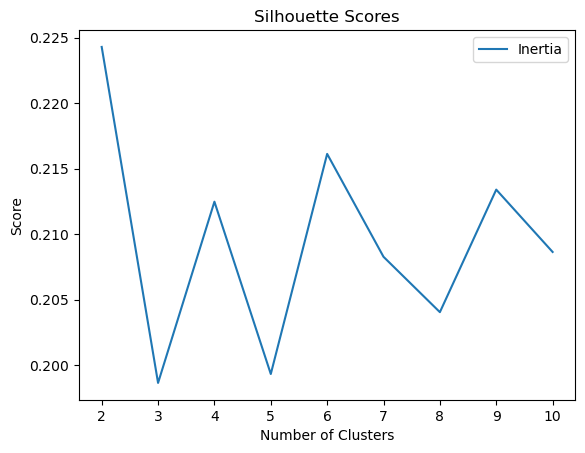

In [130]:
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil_scores[k] = silhouette_score(df_scaled, labels)

pd.Series(sil_scores).to_frame("Inertia").plot()

plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')


## DBSCAN ensity-Based Spatial Clustering of Applications with Noise

- It groups together points that are close to each other based on a predefined 
distance metric and a minimum number of points in a neighborhood. 
- Points in low-density regions are labeled as noise. 


- Automatically determines the number of clusters. 
- Handles noise and outliers effectively. 
- Works well for clusters of arbitrary shapes, unlike K-Means, which assumes spherical clusters. 
Limitations: 
- Sensitive to the choice of eps and min_samples 
- Struggles with datasets where clusters vary significantly in density. 



In [152]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1, min_samples=10)
labels_dbscan = model.fit_predict(df_scaled)

In [ ]:
pd.concat([df_train, pd.Series(labels_dbscan).to_frame("cluster")], axis=1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,cluster
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,2
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,3
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,11
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.000000,Low,7.0,Cat_1,D,0
8064,464685,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D,0
8065,465406,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D,6
8066,467299,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B,6


# Gaussian Mixture Model (GMM)

In [148]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(df_scaled)
labels = gmm.predict(df_scaled)

In [149]:
labels

array([2, 3, 0, ..., 2, 2, 3], dtype=int64)

In [ ]:
from sklearn.manifold import TSNE
ts = TSNE(n_components=2, random_state=42, perplexity=30 , learning_rate=200)
# perplexity : Controls how t-SNE balances local and global structure. Typical values range from 5 to 50.
reduced_data = ts.fit_transform(df_scaled)

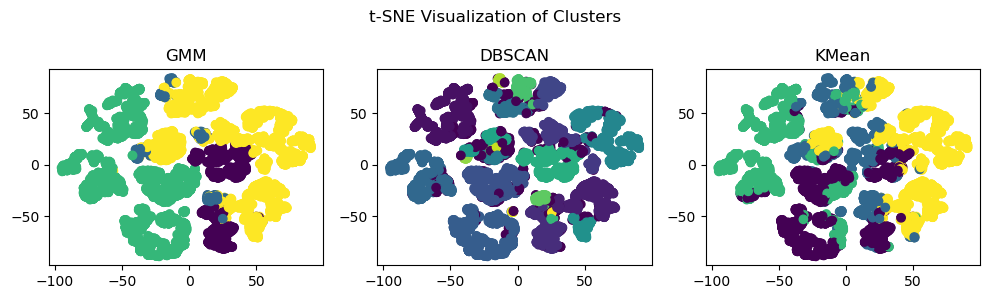

In [163]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
axes[0].set_title("GMM")
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
axes[1].set_title("DBSCAN")
axes[2].scatter(reduced_data[:, 0], reduced_data[:, 1], c=km.labels_, cmap='viridis', marker='o')
axes[2].set_title("KMean")
plt.suptitle("t-SNE Visualization of Clusters")
plt.tight_layout()
